## Pandas pivot_table() — Core Concepts

1. Definition
- A pivot table is a way to summarize and reorganize data.
- It groups your data by categories (rows/columns) and applies calculations (sum, mean, count, etc.) to numeric values.

2. Core Arguments
- Here are the key parameters you should always know:
  - data → the DataFrame you are working with.
  - values → the column(s) you want to summarize.
  - index → the column(s) that become row labels (grouping by rows).
  - columns → the column(s) that become column labels (grouping by columns).
  - aggfunc → the function(s) to apply (mean, sum, count, etc.).

3. Common aggfunc values
- "mean" → average
- "sum" → total
- "count" → how many
- "median" → middle value
- "max" / "min" → highest / lowest
- ["mean", "max", "min"] → multiple functions at once

4. Multiple values
- You can summarize more than one column at a time

5. Handling missing values
- fill_value → replaces missing results with a number (often 0).

6. Difference from groupby()
- groupby() → creates a series or dataframe that’s good for simple grouping/aggregation.
- pivot_table() → creates a matrix-style summary (rows × columns) like Excel.
  - 👉 If you want a compact summary table → use pivot_table().
  - 👉 If you want more flexible custom operations → use groupby()

7. Margins (totals)
- margins=True → adds row/column totals (like “Grand Total” in Excel).

In [2]:
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt


# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [4]:
df.pivot_table(index='job_title_short', aggfunc='size') #count → ignores NaN, gives counts per column  
                                                        #size  → includes NaN, gives total rows per group  


job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [5]:
df.pivot_table(index='job_country', values='salary_year_avg', columns='job_title_short', aggfunc='median')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


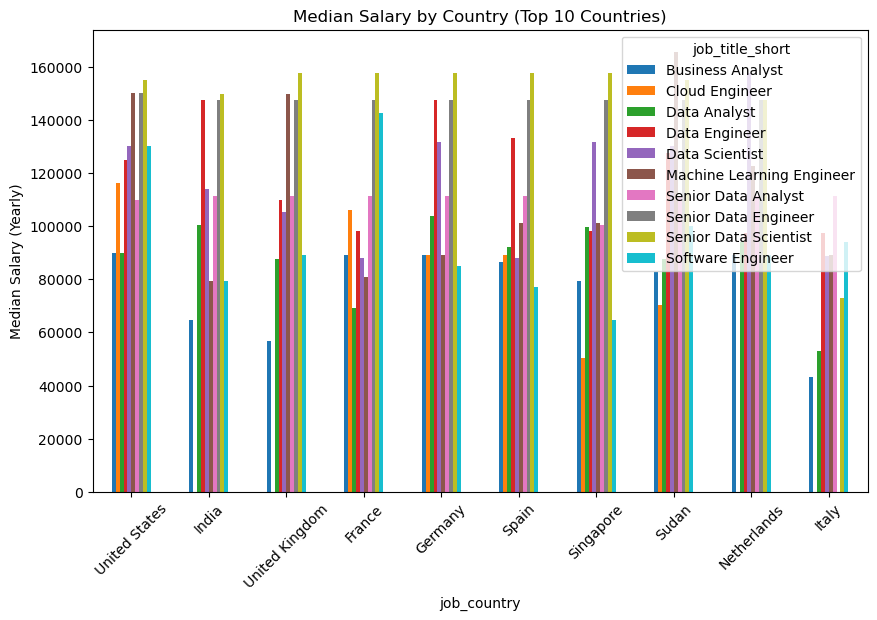

In [6]:
top_10_countries= df['job_country'].value_counts().head(10).index

df_job_country_salary= df.pivot_table(
    index='job_country',
    values='salary_year_avg',
    columns='job_title_short',
    aggfunc='median'
  )

df_job_country_salary= df_job_country_salary.loc[top_10_countries]
df_job_country_salary.plot(kind='bar', figsize=(10,6))
plt.ylabel('Median Salary (Yearly)')
plt.title('Median Salary by Country (Top 10 Countries)')
plt.xticks(rotation=45)
plt.show()



In [ ]:
top_6_countries= df['job_country'].value_counts().head(6).index

df_job_country_salary= df.pivot_table(
    index='job_country',
    values='salary_year_avg',
    columns='job_title_short',
    aggfunc='median'
  )

df_job_country_salary= df_job_country_salary.loc[top_6_countries]
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

df_job_country_salary



job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
United States,90000.0,116100.0,90000.0,125000.0,130000.0,150000.0,110000.0,150000.0,155000.0,130000.0
India,64800.0,NaN,100500.0,147500.0,114008.0,79200.0,111175.0,147500.0,149653.0,79200.0
United Kingdom,56700.0,NaN,87750.0,110000.0,105300.0,149653.0,111175.0,147500.0,157500.0,89100.0
France,89100.0,105968.0,69175.0,98301.5,88128.0,80850.0,111175.0,147500.0,157500.0,142500.0
Germany,89100.0,89100.0,103750.0,147500.0,131560.0,89100.0,111175.0,147500.0,157500.0,84975.0
Spain,86400.0,89100.0,91977.0,133000.0,88128.0,101029.0,111175.0,147500.0,157500.0,77050.0


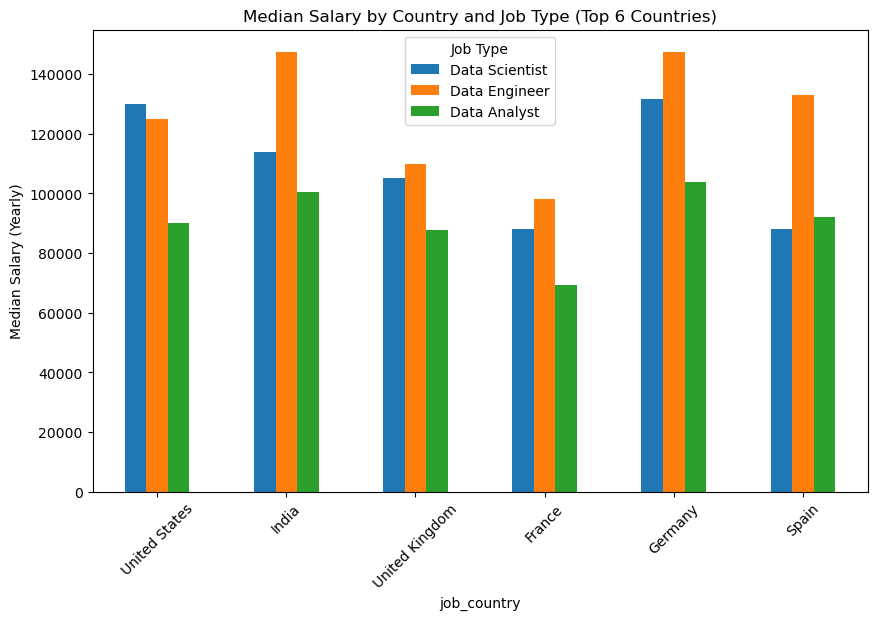

In [10]:
top_6_countries= df['job_country'].value_counts().head(6).index

df_job_country_salary= df.pivot_table(
    index='job_country',
    values='salary_year_avg',
    columns='job_title_short',
    aggfunc='median'
  )

df_job_country_salary= df_job_country_salary.loc[top_6_countries]
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']


df_job_country_salary= df_job_country_salary[job_titles]
df_job_country_salary.plot(kind='bar', figsize=(10,6))
plt.ylabel('Median Salary (Yearly)')
plt.title('Median Salary by Country and Job Type (Top 6 Countries)')
plt.xticks(rotation=45)
plt.legend(title='Job Type')
plt.show()

In [11]:
df_job_country_salary= df_job_country_salary[job_titles]
df_job_country_salary

job_title_short,Data Scientist,Data Engineer,Data Analyst
job_country,,,
United States,130000.0,125000.0,90000.0
India,114008.0,147500.0,100500.0
United Kingdom,105300.0,110000.0,87750.0
France,88128.0,98301.5,69175.0
Germany,131560.0,147500.0,103750.0
Spain,88128.0,133000.0,91977.0
